In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

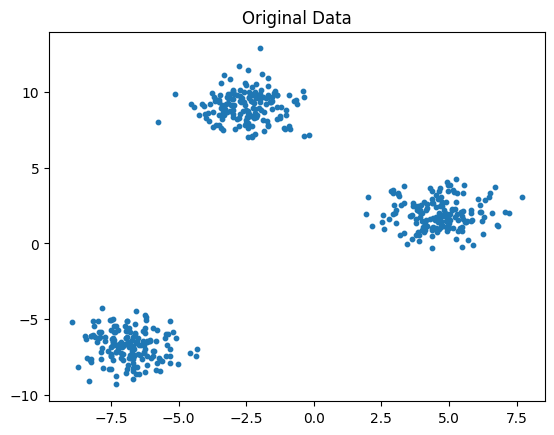

In [ ]:
# Create synthetic dataset
X, _ = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Original Data")
plt.show()


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

bandwidths = np.linspace(0.5, 4.0, 15)

results = []

for bw in bandwidths:
    ms = MeanShift(bandwidth=bw)
    labels = ms.fit_predict(X)

    # Mean Shift may assign all points to one cluster
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1

    results.append((bw, score, len(np.unique(labels))))

In [4]:
best_bw, best_score, best_k = max(results, key=lambda x: x[1])

print(f"Best Bandwidth: {best_bw:.2f}")
print(f"Silhouette Score: {best_score:.3f}")
print(f"Number of Clusters: {best_k}")

Best Bandwidth: 1.75
Silhouette Score: 0.844
Number of Clusters: 3


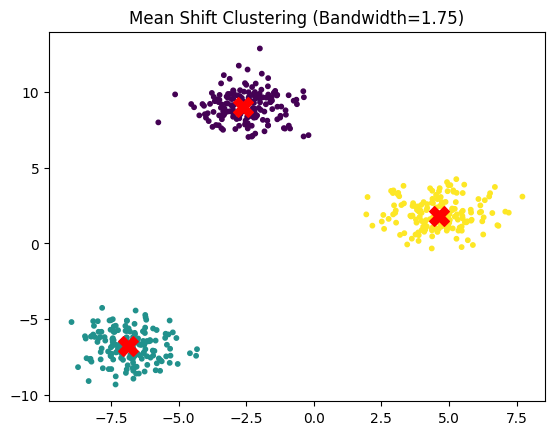

In [6]:
ms = MeanShift(bandwidth=best_bw)
labels = ms.fit_predict(X)
centers = ms.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=10)
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X")
plt.title(f"Mean Shift Clustering (Bandwidth={best_bw:.2f})")
plt.show()

In [7]:
from sklearn.cluster import estimate_bandwidth

bw_auto = estimate_bandwidth(X, quantile=0.2, n_samples=500)
print("Estimated Bandwidth:", bw_auto)

Estimated Bandwidth: 1.8769925424508822


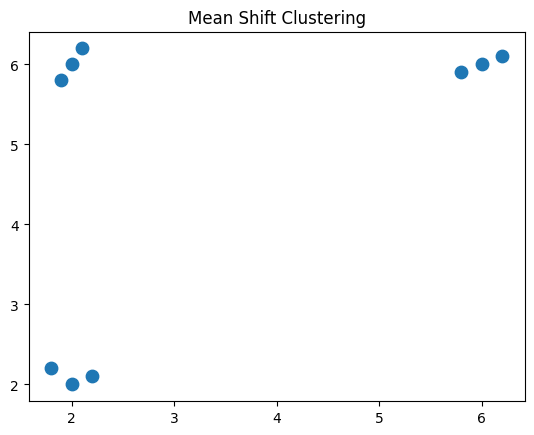

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Simple 2D dataset
X = np.array([
    [2, 2], [2.2, 2.1], [1.8, 2.2],
    [6, 6], [6.2, 6.1], [5.8, 5.9],
    [2, 6], [2.1, 6.2], [1.9, 5.8]
])

# Plot
plt.scatter(X[:, 0], X[:, 1], s=80)

plt.title(f"Mean Shift Clustering")
plt.show()



Bandwidth is the radius of the sliding window used by Mean Shift.

It determines how far the algorithm looks to compute local density.

Computes all pairwise distances between points

Sorts those distances

Selects the 30th percentile distance (quantile=0.3)

Uses that value as the bandwidth

30% of all other recorded distances in the dataset are shorter than or equal to this distance.
70% of all other recorded distances are longer than this distance.

In [13]:
# Estimate bandwidth automatically
bandwidth = estimate_bandwidth(X, quantile=0.3)
bandwidth



np.float64(0.23018856605271687)

In [14]:
# Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
labels = ms.fit_predict(X)
centers = ms.cluster_centers_

labels

array([2, 2, 3, 0, 0, 0, 1, 1, 1])

In [ ]:
centers

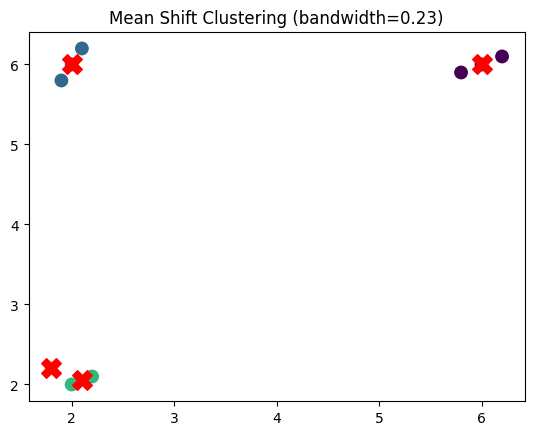

In [15]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
plt.title(f"Mean Shift Clustering (bandwidth={bandwidth:.2f})")
plt.show()